In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [ ]:
##CONFUSiON MATRIX 
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def printParams(cm):
    recall=cm[1][1]/(cm[1][0]+cm[1][1])
    precision=cm[1][1]/(cm[1][1]+cm[0][1])
    accuracy=(cm[1][1]+cm[0][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
    fm=(2*recall*precision)/(recall+precision)
    print("ACCURACY:",accuracy)
    print("PRECISION:",precision)
    print("RECALL:",recall)
    print("F-measure",fm)



In [ ]:
df=pd.read_csv('Phishing.csv')

In [ ]:
df.head(20)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,1,-1,1,0,0,-1,-1,-1,0,1,1,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,1,1,-1,-1,0,-1,-1,-1,0,1,1,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,1,-1,1,0,1,-1,1,1,0,1,1,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,1,1,1,0,1,-1,1,1,0,1,1,1,1,1,-1,0,-1,1,0,1,-1


In [ ]:
data=df.values;
print(data.shape)

(11055, 31)


In [ ]:
X=data[:,0:30]
Y=data[:,30]
print(X.shape)
print(Y.shape)

(11055, 30)
(11055,)


In [ ]:
def fun(val):
  if val==-1:
    return 0
  elif val==0:
    return 1
  else:
    return 2

In [ ]:
X=np.vectorize(fun)(X)
Y=np.where(Y==-1,0,Y)
print(X[:20])
print(Y[:20])

[[0 2 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 1 2 2 2 2 0 0 0 0 2 2 0]
 [2 2 2 2 2 0 1 2 0 2 2 0 2 1 0 0 2 2 1 2 2 2 2 0 0 1 0 2 2 2]
 [2 1 2 2 2 0 0 0 0 2 2 0 2 1 0 0 0 0 1 2 2 2 2 2 0 2 0 2 1 0]
 [2 1 2 2 2 0 0 0 2 2 2 0 0 1 1 0 2 2 1 2 2 2 2 0 0 2 0 2 0 2]
 [2 1 0 2 2 0 2 2 0 2 2 2 2 1 1 0 2 2 1 0 2 0 2 0 0 1 0 2 2 2]
 [0 1 0 2 0 0 2 2 0 2 2 0 2 1 1 0 0 0 1 2 2 2 2 2 2 2 0 2 0 0]
 [2 1 0 2 2 0 0 0 2 2 2 2 0 0 1 0 0 0 1 2 2 2 2 2 0 0 0 2 1 0]
 [2 1 2 2 2 0 0 0 2 2 2 0 0 1 0 0 2 2 1 2 2 2 2 0 0 1 0 2 1 2]
 [2 1 0 2 2 0 2 2 0 2 2 0 2 1 2 0 2 2 1 2 2 2 2 2 0 2 2 2 1 2]
 [2 2 0 2 2 0 0 2 0 2 2 2 2 1 2 0 2 2 1 2 2 2 2 2 0 1 0 2 1 2]
 [2 2 2 2 2 0 1 2 2 2 2 2 0 1 1 0 0 0 1 2 2 2 2 0 2 2 2 2 0 0]
 [2 2 0 2 2 0 2 0 0 2 2 2 2 0 0 0 0 0 1 2 2 2 2 0 0 0 0 2 1 0]
 [0 2 0 2 0 0 1 1 2 2 2 0 0 0 2 0 2 2 1 0 2 0 2 2 0 0 0 2 1 2]
 [2 2 0 2 2 0 1 0 2 2 2 2 0 0 0 0 2 2 1 2 2 2 2 0 0 1 0 2 2 2]
 [2 2 0 2 2 2 0 2 0 2 2 0 2 1 2 2 2 2 1 2 2 2 2 2 0 2 0 2 0 2]
 [2 0 0 0 2 0 1 1 2 2 2 2 0 0 1 0 2 2 1 2 2 2 2 2 0 0 0

In [ ]:
split = int(0.8*X.shape[0])
print(split)


8844


In [ ]:
Y.shape

(11055,)

In [ ]:
X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(8844, 30) (8844,) (2211, 30) (2211,)


In [ ]:
###KNN####
def euclideanDist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    distances = []
    noOfSamples = X.shape[0]
    for i in range(noOfSamples):
        d = euclideanDist(queryPoint,X[i])
        distances.append((d,Y[i]))
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]
    distances = np.array(distances)
    new_distances = np.unique(distances[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_distances[1].argmax()
    pred = new_distances[0][index]
    
    return pred

In [ ]:
Y_pred=[int(knn(X_test,Y_test,point)) for point in X_test]

In [ ]:
print(Y_pred[:100])

[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0]


In [ ]:
##ACCURACY
Y_pred=np.array(Y_pred)
print(np.sum(Y_pred==Y_test)/Y_test.shape[0])

0.9502487562189055


Confusion matrix, without normalization
[[ 956   25]
 [  85 1145]]
ACCURACY: 0.9502487562189055
PRECISION: 0.9786324786324786
RECALL: 0.9308943089430894
F-measure 0.9541666666666666


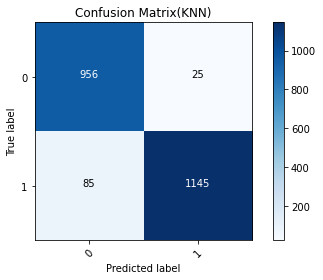

In [ ]:
cnf1=confusion_matrix(Y_test,Y_pred)
plot_confusion_matrix(cnf1,[0,1],normalize=False,title="Confusion Matrix(KNN)")
printParams(cnf1)

In [ ]:
####Logistic Regression
def hypothesis(x,w,b):
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)

    return -err/m


def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx)
        
    
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]

def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_accuracy(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

def logistic_regression(X_train,Y_train,X_test,Y_test,lr,iterations):
  loss = []
  acc = []

  W = 4*np.random.random((X_train.shape[1],))
  b = 6*np.random.random()
  for i in range(iterations):
    l,W,b = grad_descent(X_train,Y_train,W,b,learning_rate=lr)
    acc.append(get_accuracy(X_test,Y_test,W,b))
    loss.append(l)
  return loss,acc


In [ ]:
loss_log_reg,acc_log_reg=logistic_regression(X_train,Y_train,X_test,Y_test,0.01,1000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


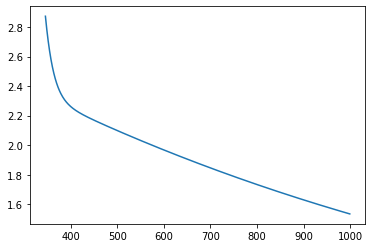

0.751696065128901


In [ ]:
plt.plot(loss_log_reg)
plt.show()
print(acc_log_reg[-1])

In [ ]:
##Logistic Regression (SKLEARN)
clf=LogisticRegression(random_state=0,max_iter=1000)
clf.fit(X_train,Y_train)
print(clf.score(X_test,Y_test))

0.9208502939846224


Confusion matrix, without normalization
[[ 881  100]
 [  75 1155]]
ACCURACY: 0.9208502939846224
PRECISION: 0.9203187250996016
RECALL: 0.9390243902439024
F-measure 0.9295774647887323


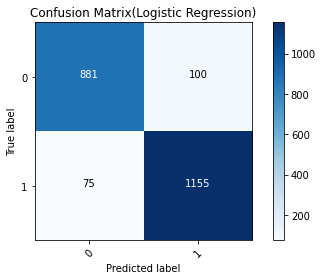

In [ ]:
cnf2=confusion_matrix(Y_test,clf.predict(X_test))
plot_confusion_matrix(cnf2,[0,1],normalize=False,title="Confusion Matrix(Logistic Regression)")
printParams(cnf2)

In [ ]:
##NAIVE BAYES
mnb=MultinomialNB()

In [ ]:
mnb.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
mnb.score(X_test,Y_test)

0.8502939846223428

Confusion matrix, without normalization
[[ 770  211]
 [ 120 1110]]
ACCURACY: 0.8502939846223428
PRECISION: 0.8402725208175624
RECALL: 0.9024390243902439
F-measure 0.8702469619756958


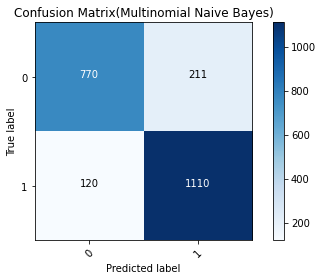

In [ ]:
cnf3=confusion_matrix(Y_test,mnb.predict(X_test))
plot_confusion_matrix(cnf3,[0,1],normalize=False,title="Confusion Matrix(Multinomial Naive Bayes)")
printParams(cnf3)

In [ ]:
bnb=BernoulliNB()
bnb.fit(X_train,Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
bnb.score(X_test,Y_test)

0.9054726368159204

Confusion matrix, without normalization
[[ 829  152]
 [  57 1173]]
ACCURACY: 0.9054726368159204
PRECISION: 0.8852830188679245
RECALL: 0.9536585365853658
F-measure 0.9181996086105675


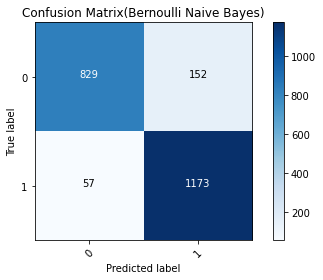

In [ ]:
cnf4=confusion_matrix(Y_test,bnb.predict(X_test))
plot_confusion_matrix(cnf4,[0,1],normalize=False,title="Confusion Matrix(Bernoulli Naive Bayes)")
printParams(cnf4)

In [ ]:
##SVM
svm=SVC(kernel='linear',C=1.0,random_state=5)

In [ ]:
svm.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=5, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm.score(X_test,Y_test)

0.9253731343283582

Confusion matrix, without normalization
[[ 884   97]
 [  68 1162]]
ACCURACY: 0.9253731343283582
PRECISION: 0.9229547259729944
RECALL: 0.9447154471544715
F-measure 0.9337083165930091


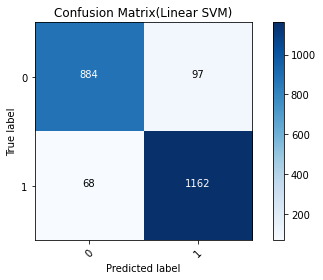

In [ ]:
cnf5=confusion_matrix(Y_test,svm.predict(X_test))
plot_confusion_matrix(cnf5,[0,1],normalize=False,title="Confusion Matrix(Linear SVM)")
printParams(cnf5)
